<a href="https://colab.research.google.com/github/ankurmahesh/MDB/blob/master/CE200A_Problem_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [16]:
def plot_contourf(x, y, C, title_text):
  """
  Makes a contour plot C using x and y
  """
  plt.figure(dpi=300)
  xx, yy = np.meshgrid(x, y)
  plt.contourf(xx, yy, C.T)
  plt.title(title_text)
  plt.colorbar()

  plt.show()

def find_minimum_index(C):
  """
  inputs
  -------

        C       (np.array). : a 2-D np array corresponding to B or O

  returns
  -------
        the 2-D index of the minimum value of array
        for example, if C is [[1,2,3],
                              [4,0,4],
                              [6,7,8]] the function would return (1,1)
  """
  return np.unravel_index(C.argmin(), C.shape)

In [29]:
def advection_diffusion_FTCS(Cr, x, y, r, O_sat, x_0, y_0,
                             Q_B, K_r, K_d):
    # c[l,j,n] where j is the index along x and n is the index along t
    # initialize with zeros
    #set x dimension to be +1 to account for ghost point in x
    #set y dimension to be len(y)+2 to account for ghost points in y
    B = np.zeros(([len(x)+1,len(y)+2]))
    O = np.zeros(([len(x)+1,len(y)+2]))
    O[:] = O_sat
    B_source = np.zeros(([len(x)+1, len(y)+2]))
    B_source[x_0, y_0] = Q_B
    
    eps = 1e-6

    steady_state = False

    iter, max_iter = 0, 100
    #n is our time index
    #l is our x index
    #j is our y index
    while not steady_state and iter < max_iter:
      iter += 1
      #boundary conditions
      B[0,:] = 0
      O[0,:] = O_sat

      #Neumann boundary conditions
      #x=L BC using ghost point
      B[-1] = B[-3] 
      O[-1] = O[-3]

      #y=0 BC using ghost point
      B[:,0] = B[:,2]
      O[:,0] = O[:,2]

      #y=W BC using ghost point
      B[:,-1] = B[:,-3]
      O[:,-1] = O[:,-3]

      O_old = O.copy()
      B_old = B.copy()

      for l in range(1, x.shape[0]):
        for j in range(1, y.shape[0]+1):
          B[l, j] = B_old[l, j] + r *(B_old[l,j+1] + B_old[l, j-1] - 4*B_old[l,j] + B_old[l+1,j] + \
                                      B_old[l-1,j]) - (Cr / 2.0) * (B_old[l+1,j] - B_old[l-1,j]) - dt * K_r * B_old[l,j] + (B_source[l,j] * dt) / (dx * dx)
          O[l, j] = O_old[l, j] + r *(O_old[l,j+1] + O_old[l, j-1] - 4*O_old[l,j] + O_old[l+1,j] + \
                                      O_old[l-1,j]) - (Cr / 2.0) * (O_old[l+1,j] - O_old[l-1,j]) + \
                                      dt * K_a * (O_sat - O_old[l,j]) - K_d * B_old[l,j] * dt
      
      min_x, min_y = find_minimum_index(O)
      print("Minimum DO: {}.  Location indices: ({},{})".format(O.min(), min_x, min_y))
      if O.min() < 6:
        print("The DO concentration has dipped below 6!")
      if np.abs(O - O_old).sum() < eps and np.abs(B - B_old).sum() < eps:
        steady_state = True

    plot_contourf(x, y, B[:-1, 1:-1], "Contour plot of B, the biological oxygen demand")
    plot_contourf(x, y, O[:-1, 1:-1], "Contour plot of O, the dissolved oxygen")
    # Return concentration
    return B,O

the value of r is 0.125.  r should be less than 1/4
the array is of size (151,31)
Minimum DO: 8.0.  Location indices: (0,0)
Minimum DO: 7.95625.  Location indices: (5,5)
Minimum DO: 7.912828125000001.  Location indices: (5,5)
Minimum DO: 7.872959023437501.  Location indices: (5,5)
Minimum DO: 7.836591846191407.  Location indices: (5,5)
Minimum DO: 7.803116894234131.  Location indices: (5,5)
Minimum DO: 7.771937612636255.  Location indices: (5,5)
Minimum DO: 7.742587707303327.  Location indices: (5,5)
Minimum DO: 7.714727433722536.  Location indices: (5,5)
Minimum DO: 7.688114194358092.  Location indices: (5,5)
Minimum DO: 7.662574169391788.  Location indices: (5,5)
Minimum DO: 7.637980718513843.  Location indices: (5,5)
Minimum DO: 7.61423927219951.  Location indices: (5,5)
Minimum DO: 7.59127713457853.  Location indices: (5,5)
Minimum DO: 7.5690366954896104.  Location indices: (5,5)
Minimum DO: 7.547470920787708.  Location indices: (5,5)
Minimum DO: 7.526540341412524.  Location indice

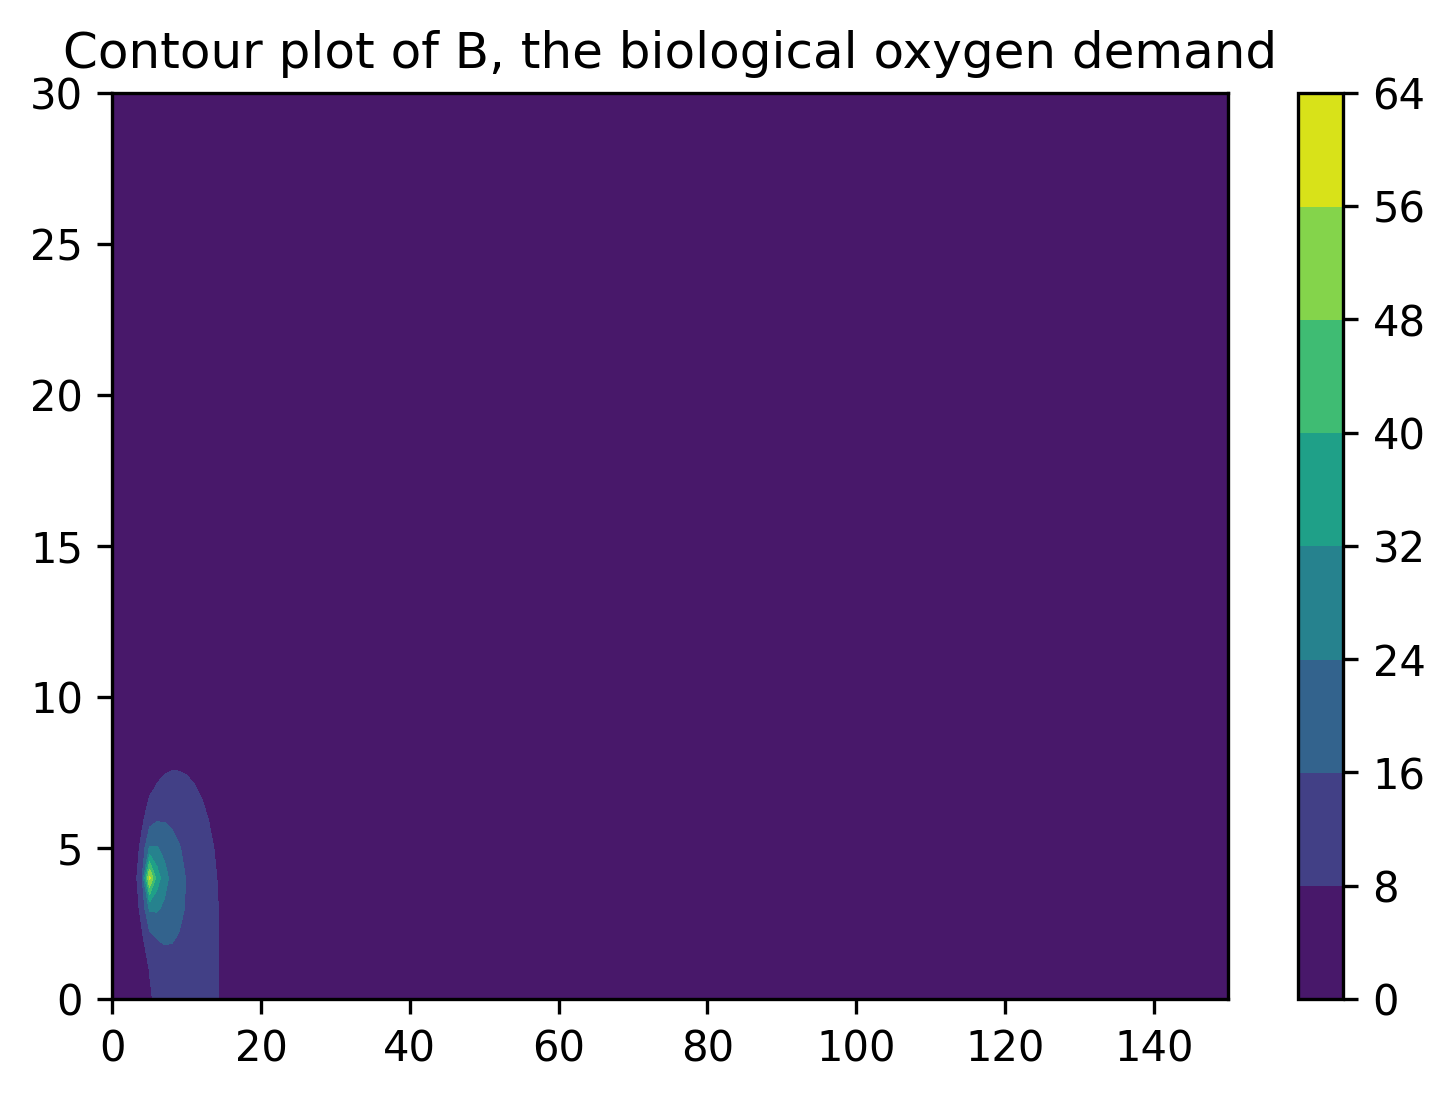

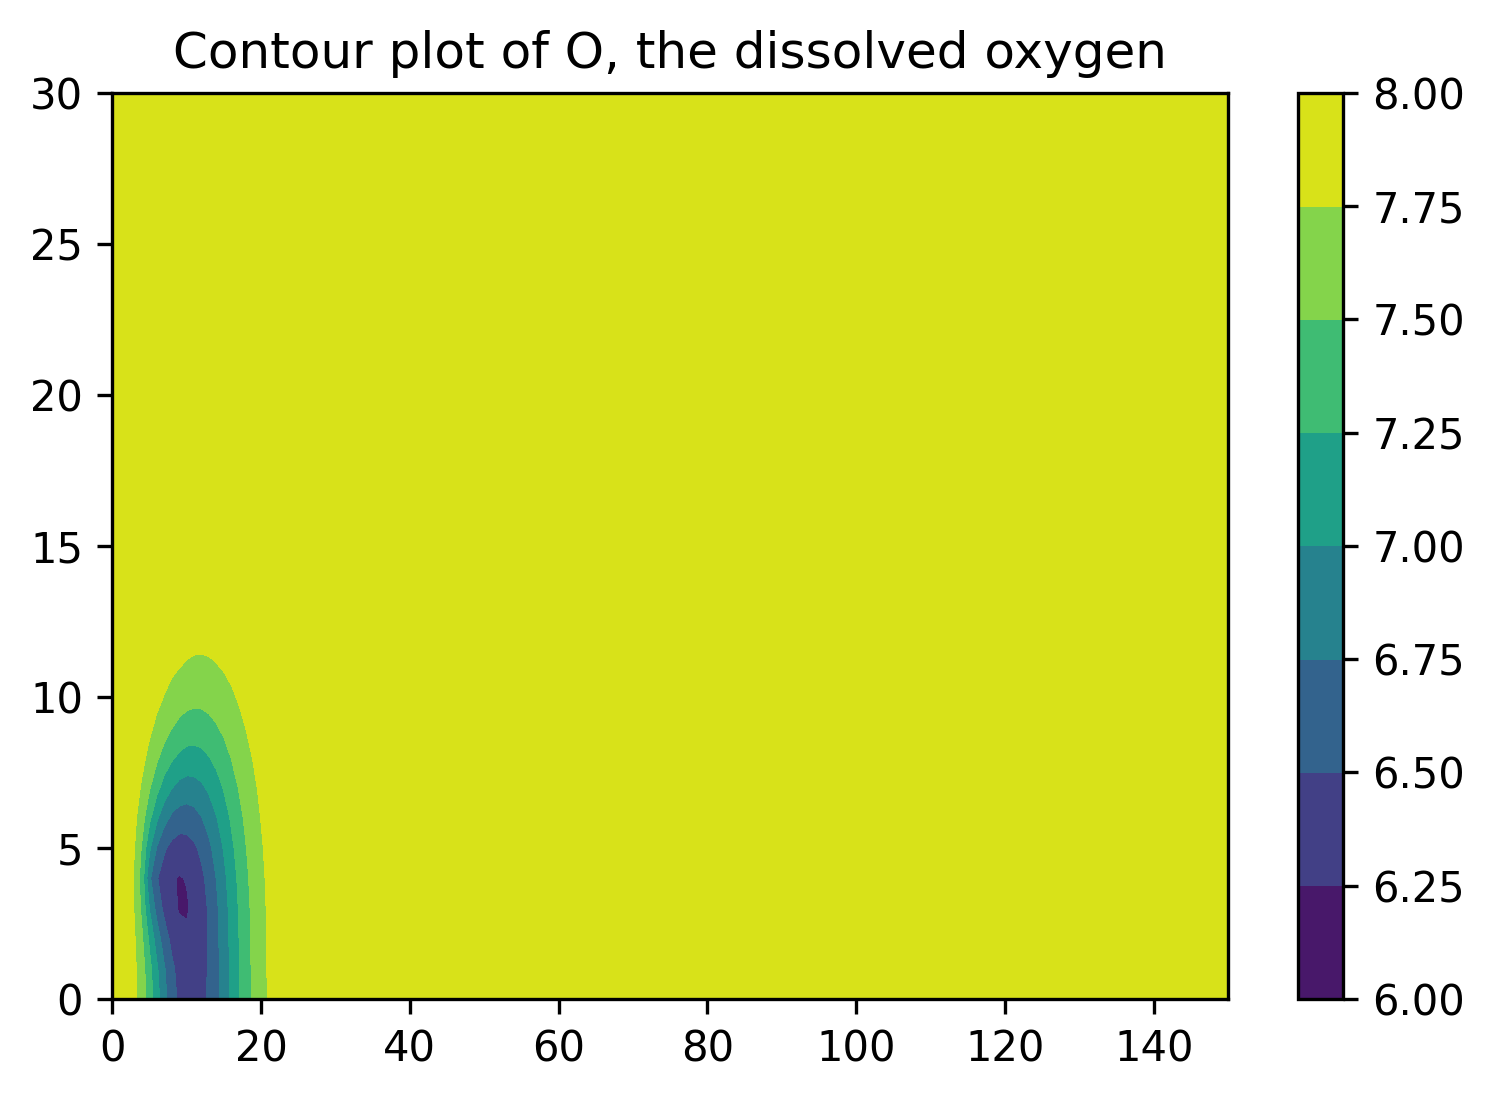

In [30]:
# Initialize the variables
u = 0.4 #[m/s]
v = 0.
O_sat = 8
D = 0.5
K_r = 0.01 
K_d = 0.01
K_a = 0.02
Q_B = 70

yi = 0
xi = 0 #[m] initial x position
xf = 150 #[m] final x
yf = 30
ti = 0 #[s] initial t
tf = 2 #[s] final t
dx = 1 #[m]

Cr = 0.1
dt =  (Cr * dx)/u #set dt based on dx and Cr which are given above
r = (D * dt)/(dx**2)
print("the value of r is {}.  r should be less than 1/4".format(r))

#define x and t vectors
x = np.arange(xi,xf+dx,dx)
y = np.arange(yi,yf+dx,dx) #dy = dx

print("the array is of size ({},{})".format(x.shape[0], y.shape[0]))

x_0, y_0 = 5, 5

# Calculate the concentration at all x and t by calling the function you wrote above
c = advection_diffusion_FTCS(Cr, x, y, r, O_sat, x_0, y_0,
                             Q_B, K_r, K_d)
